In [1]:
# Comment the following cell if running through the command :
# papermill runnable_HPO.ipynb executed_HPO.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

In [2]:
global_seed = 88
save_results = False
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST_via_torch",
                      "difficulty" : "standard",
                      "num_tasks" : 3,
                      "train_percentage" : 0.2,
                      "num_val_benchmarks" : 1,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "Grow_without_GroHess",
                   "grow_from" : "output",
                   #"hessian_percentile" : 95,
                   #"grad_percentile" : 95,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 100,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "greedy_HPO",
                "n_trials" : 1,
                "lr" : (5e-5, 2e-3),
                "num_epochs" : (3,3),
                #"tau" : (0.995, 0.999),
                #"ewc_lambda" : (200,200)
                #"lwf_alpha" : (0.1, 0.9),
                #"lwf_temperature" : (1, 3),
                }

In [3]:
# Parameters specific to the visualization
visualization_settings = {"savefig" : False,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True}

In [4]:
import sys
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append("Methods/" + method_settings["method_name"])
sys.path.append("HPO_lib")
sys.path.append("HPO_lib/benchmark_loaders")


path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

## Imports

In [5]:
from HPO_lib.abstract_torch import get_device
from HPO_lib.get_benchmarks import get_benchmarks
from HPO_lib.run_HPO import run_HPO
from HPO_lib.validation import validate
from HPO_lib.visualize import visualize_HPO, visualize_validation
from HPO_lib.save_and_load_results import save

In [6]:
device = get_device(2)

## Get benchmarks

In [7]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

## Run HPO

In [8]:
test_accs_matrix, best_params_list = run_HPO(HPO_settings, method_settings, benchmark_settings, benchmarks_list[0], device, global_seed)

[I 2024-08-08 14:25:23,366] A new study created in memory with name: Search number 1



--------------------------------------------------
LEARNING TASK 1


100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
[I 2024-08-08 14:25:34,195] Trial 0 finished with value: 91.54165333333323 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 3}. Best is trial 0 with value: 91.54165333333323.


Number of frozen neurons : 0.0
Number of trainable neurons : 100


100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
[I 2024-08-08 14:25:41,258] A new study created in memory with name: Search number 2



--------------------------------------------------
LEARNING TASK 2


100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
[I 2024-08-08 14:25:55,500] Trial 0 finished with value: 90.69221333333333 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 3}. Best is trial 0 with value: 90.69221333333333.


Number of frozen neurons : 100
Number of trainable neurons : 100


100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
[I 2024-08-08 14:26:02,584] A new study created in memory with name: Search number 3



--------------------------------------------------
LEARNING TASK 3


100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
[I 2024-08-08 14:26:21,770] Trial 0 finished with value: 89.30940444444441 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 3}. Best is trial 0 with value: 89.30940444444441.


Number of frozen neurons : 200
Number of trainable neurons : 100


100%|██████████| 3/3 [00:04<00:00,  1.34s/it]


## Visualize results

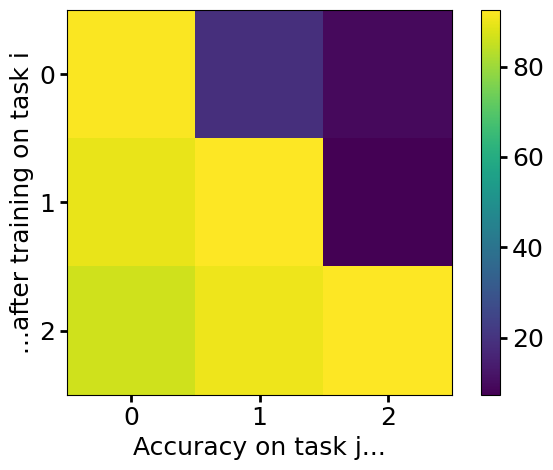

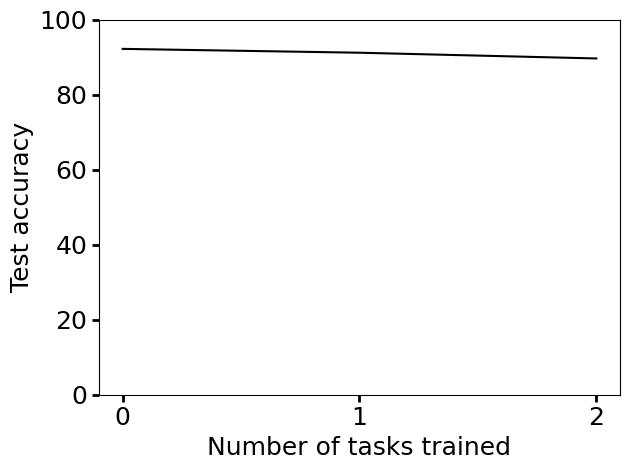

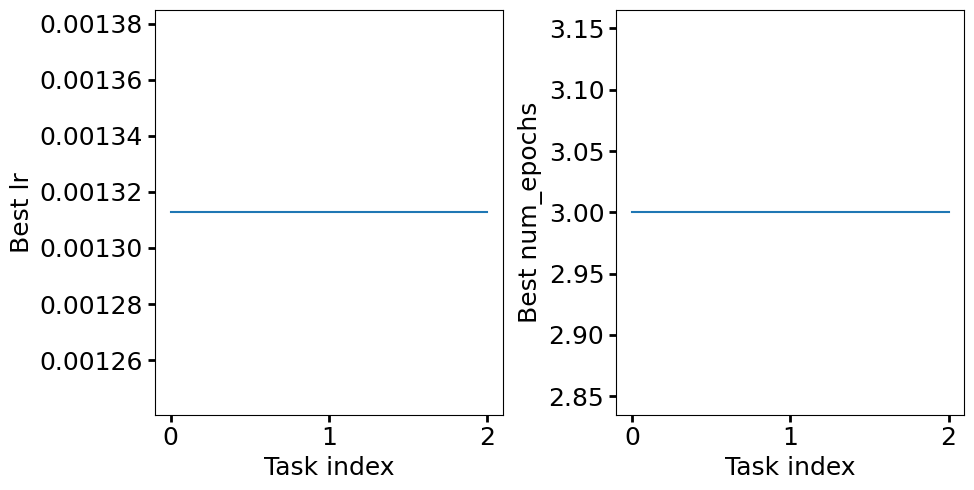

In [9]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Validate

In [10]:
print(best_params_list)

[{'lr': 0.0013127245462383958, 'num_epochs': 3}, {'lr': 0.0013127245462383958, 'num_epochs': 3}, {'lr': 0.0013127245462383958, 'num_epochs': 3}]


In [11]:
val_accs_matrix = validate(HPO_settings, benchmarks_list, benchmark_settings, method_settings, best_params_list, device, global_seed)


BENCHMARK 1

--------------------------------------------------
LEARNING TASK 1
Number of frozen neurons : 0.0
Number of trainable neurons : 100


  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:03<00:00,  1.31s/it]



--------------------------------------------------
LEARNING TASK 2
Number of frozen neurons : 100
Number of trainable neurons : 100


100%|██████████| 3/3 [00:03<00:00,  1.33s/it]



--------------------------------------------------
LEARNING TASK 3
Number of frozen neurons : 200
Number of trainable neurons : 100


100%|██████████| 3/3 [00:04<00:00,  1.33s/it]


## Visualize validation

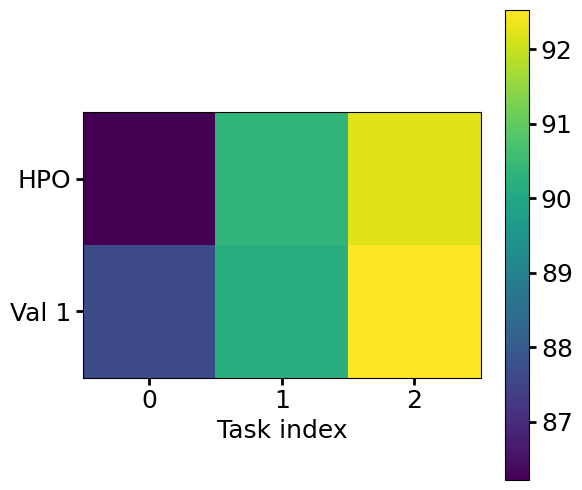

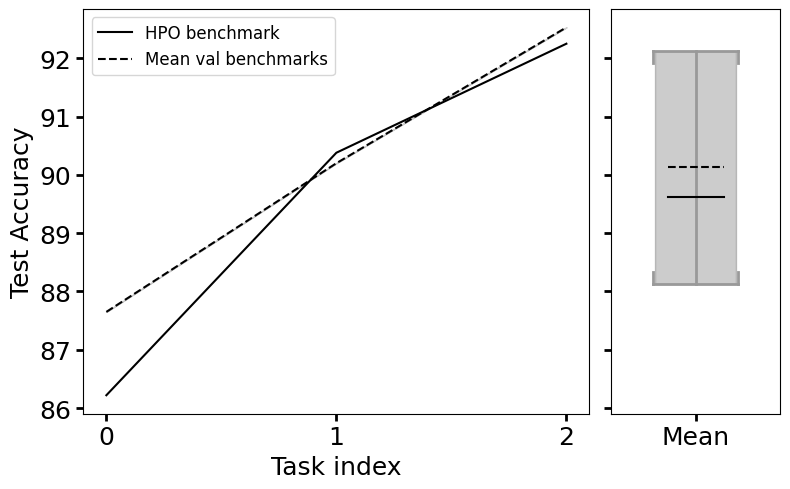

In [12]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Save results matrices

In [13]:
save(test_accs_matrix, best_params_list, val_accs_matrix, HPO_settings, method_settings, benchmark_settings, save_results)